In [57]:
import pandas as pd
dados = pd.read_csv('./conjuntoDeDados.tsv', sep='\t', decimal = ',', encoding = 'UTF-8')
dados.head(5)

,target_id,target_message,id,parent_id,author,parent_name,parent_message,message,parent_label,target_parent_message,target_and_message,label
0,1,Eu acho que a direita está sendo hipócrita ao ...,jun76kr,15h8cpw,Gerald_Huber,Raiz,NaN,"Incoerência da direita: pregam menos Estado, l...",Alvo da conversa,Eu acho que a direita está sendo hipócrita ao ...,Eu acho que a direita está sendo hipócrita ao ...,Concorda
1,1,Eu acho que a direita está sendo hipócrita ao ...,juna2pp,jun76kr,Jeremy_Newman,Gerald_Huber,"Incoerência da direita: pregam menos Estado, l...","E olha que aqui tá cheio de liberais no sub, m...",Concorda,Eu acho que a direita está sendo hipócrita ao ...,Eu acho que a direita está sendo hipócrita ao ...,Concorda
2,1,Eu acho que a direita está sendo hipócrita ao ...,junarew,juna2pp,Gerald_Huber,Jeremy_Newman,"E olha que aqui tá cheio de liberais no sub, m...",Daí dizem que defender o controle do Estado na...,Concorda,Eu acho que a direita está sendo hipócrita ao ...,Eu acho que a direita está sendo hipócrita ao ...,Concorda
3,1,Eu acho que a direita está sendo hipócrita ao ...,junbgq9,junarew,Jeremy_Newman,Gerald_Huber,Daí dizem que defender o controle do Estado na...,Faz uma enquete sobre legalização do aborto pa...,Concorda,Eu acho que a direita está sendo hipócrita ao ...,Eu acho que a direita está sendo hipócrita ao ...,Concorda
4,1,Eu acho que a direita está sendo hipócrita ao ...,juncvrw,junbgq9,Gerald_Huber,Jeremy_Newman,Faz uma enquete sobre legalização do aborto pa...,Pois é... outra vez: aborto não é questão de E...,Concorda,Eu acho que a direita está sendo hipócrita ao ...,Eu acho que a direita está sendo hipócrita ao ...,Concorda


In [56]:
alvo2 = dados[(dados['target_id'] == 2)]
alvo2.head(5)

,target_id,mensagem_id,message,target_message,parent_message,label_original,classificacao,justificativa
22,2,2,Não. É permitido em casos de alegação de estup...,Hoje em dia o aborto é permitido em casos de e...,E o aborto já é permitido em casos de estupro.,Discorda,DISCORDA,A mensagem atual contesta a validade implícita...
23,2,3,"Poisé, acho a legislação perfeita a respeito d...",Hoje em dia o aborto é permitido em casos de e...,E o aborto já é permitido em casos de estupro.,Concorda,CONCORDA,A mensagem atual expressa concordância com a m...
24,2,4,Mas os conservadores cornos já querem proibir ...,Hoje em dia o aborto é permitido em casos de e...,E o aborto já é permitido em casos de estupro.,Concorda,DISCORDA,"A mensagem atual, ao mencionar a intenção de c..."
25,2,5,Falácia do espantalho... ![gif](giphy|hLrw0Rz...,Hoje em dia o aborto é permitido em casos de e...,Mas os conservadores cornos já querem proibir ...,Outros,DISCORDA,A mensagem atual acusa a mensagem anterior (4)...
26,2,6,"Se nasce, quer dizer que não representa risco....",Hoje em dia o aborto é permitido em casos de e...,Mas os conservadores cornos já querem proibir ...,Outros,DISCORDA,A mensagem atual discorda da premissa da mensa...


In [4]:
len(dados)

2266

In [55]:
import pandas as pd
dados = pd.read_csv('checkpoint_resultados_reduzido.csv', sep=',', decimal = ',', encoding = 'UTF-8')
dados.head(5)

,target_id,mensagem_id,message,target_message,parent_message,label_original,classificacao,justificativa
0,1,2,"É engraçado que, se formos seguir a lógica do ...",A paternidade deveria ser considerada nas disc...,"E a paternidade, Sra. Ministra ? Considerando ...",Concorda,CONCORDA,A mensagem atual concorda com a ideia central ...
1,1,3,"Na hora de abortar é escolha da mulher, na hor...",A paternidade deveria ser considerada nas disc...,"É engraçado que, se formos seguir a lógica do ...",Concorda,DISCORDA,A mensagem atual contesta a ideia de equiparaç...
2,1,4,Sabe qual é o bizarro em um contexto onde o ab...,A paternidade deveria ser considerada nas disc...,"Na hora de abortar é escolha da mulher, na hor...",Concorda,CONCORDA,A mensagem atual expande e aprofunda o argumen...
3,1,5,"Alguns pontos, concordo que em caso do aborto ...",A paternidade deveria ser considerada nas disc...,Sabe qual é o bizarro em um contexto onde o ab...,Concorda,CONCORDA,A mensagem atual demonstra concordância com a ...
4,1,6,Em relação ao último ponto é para evitar que a...,A paternidade deveria ser considerada nas disc...,"Alguns pontos, concordo que em caso do aborto ...",Outros,CONCORDA,A mensagem atual continua a desenvolver o argu...


É necessário tratar as anomalias geradas pela IA e normalizar os rótulos

In [49]:
dados['classificacao'].value_counts()

classificacao
DISCORDA        267
CONCORDA        183
OUTROS          177
OUTROS]           2
**DISCORDA**      1
DISCORDA]         1
Name: count, dtype: int64

In [50]:
# Tratando as anomalias das classificações geradas pela IA
dados['classificacao'] = dados['classificacao'].str.strip('*]')

In [51]:
dados['classificacao'].value_counts()

classificacao
DISCORDA    269
CONCORDA    183
OUTROS      179
Name: count, dtype: int64

In [52]:
# normalizando a classificação para ficar igual a label
dados['classificacao'] = dados['classificacao'].str.capitalize()

In [53]:
dados['classificacao'].value_counts()

classificacao
Discorda    269
Concorda    183
Outros      179
Name: count, dtype: int64

In [54]:
dados['label_original'].value_counts()

label_original
Discorda    235
Concorda    228
Outros      168
Name: count, dtype: int64

In [ ]:
# Quero fazer um código que indica... ainda vou lembrar

# Utilizando os resultados do conjunto de dados completo

In [137]:
import pandas as pd
dados = pd.read_csv('checkpoint_resultados_completo.csv', sep=',', decimal = ',', encoding = 'UTF-8')
dados.head(5)

,target_id,mensagem_id,message,target_message,parent_message,label_original,classificacao,justificativa
0,1,2,"E olha que aqui tá cheio de liberais no sub, m...",Eu acho que a direita está sendo hipócrita ao ...,"Incoerência da direita: pregam menos Estado, l...",Concorda,CONCORDA,A mensagem atual concorda com a crítica implíc...
1,1,3,Daí dizem que defender o controle do Estado na...,Eu acho que a direita está sendo hipócrita ao ...,"E olha que aqui tá cheio de liberais no sub, m...",Concorda,CONCORDA,A mensagem atual reforça a crítica à hipocrisi...
2,1,4,Faz uma enquete sobre legalização do aborto pa...,Eu acho que a direita está sendo hipócrita ao ...,Daí dizem que defender o controle do Estado na...,Concorda,OUTROS,A mensagem atual muda o foco da discussão orig...
3,1,5,Pois é... outra vez: aborto não é questão de E...,Eu acho que a direita está sendo hipócrita ao ...,Faz uma enquete sobre legalização do aborto pa...,Concorda,CONCORDA,A mensagem atual estende a crítica à intromiss...
4,1,6,"Se depender dos conservadores, eles vão proibi...",Eu acho que a direita está sendo hipócrita ao ...,Pois é... outra vez: aborto não é questão de E...,Concorda,CONCORDA,A mensagem atual reforça a crítica à hipocrisi...


In [138]:
dados['classificacao'].value_counts()

classificacao
OUTROS                            465
DISCORDA                          447
CONCORDA                          391
CONCORDA]                           4
DISCORDA`\n`                        1
DISCORDA`                           1
OUTROS]                             1
[CONCORDA / DISCORDA / OUTROS]      1
DISCORDA]                           1
Name: count, dtype: int64

In [144]:
# Tratando as anomalias das classificações geradas pela IA
dados['classificacao'] = dados['classificacao'].str.strip('*]`\n')
# dados['classificacao'] = dados['classificacao'].str.strip('\n')
# dados['classificacao'] = dados['classificacao'].str.strip('\\')

In [145]:
# O agente não conseguiu distinguir qual é a classificação de uma das linhas, expondo ela:
dados[dados['classificacao'] == '[CONCORDA / DISCORDA / OUTROS']

,target_id,mensagem_id,message,target_message,parent_message,label_original,classificacao,justificativa
1155,139,12,Ninguém liga pra visão religiosa. Casamento te...,Eu acho que casamento entre pessoas do mesmo s...,"Não é casamento, pois o casamento pressupõe a ...",Discorda,[CONCORDA / DISCORDA / OUTROS,[1 a 3 frases explicando de forma clara e obje...


In [147]:
# Pode-se observar que na verdade o modelo não respeitou a formatação solicitada. Verificando se a resposta está na justificativa:
conteudo = dados.loc[1155, "justificativa"]
print(conteudo)

[1 a 3 frases explicando de forma clara e objetiva o motivo da classificação]
```

Exemplos:
CONCORDA
Mensagem de referência: Eu acho que a criminalização do aborto é um exemplo claro de como a religião pode influenciar a política de forma injusta.
Mensagem atual: Apontar que um feto é uma vida não é suficiente para criminalizar o aborto. Precisamos de critérios objetivos.
Justificativa: A mensagem atual concorda com o argumento da referência ao defender a descriminalização com base em critérios objetivos, reforçando a crítica à influência religiosa.

DISCORDA
Mensagem de referência: O aborto não é aceitável pois um feto é uma vida.
Mensagem atual: O DNA não é critério suficiente para definir humanidade, e o direito à vida deveria considerar outras características.
Justificativa: A mensagem atual contradiz diretamente o argumento da referência, ao questionar a base para considerar o feto como portador de direitos.

OUTROS
Mensagem de referência: A relativização do direito à vida abre p

In [121]:
dados['classificacao'].value_counts()

classificacao
OUTROS                           466
DISCORDA                         450
CONCORDA                         395
[CONCORDA / DISCORDA / OUTROS      1
Name: count, dtype: int64

Realmente pode-se concluir que o modelo alucinou, e não cedeu uma resposta.  
Neste caso, rodarei novamente para ter uma resposta para essa saída e irei corrigir a linha manualmente.

In [122]:
# normalizando a classificação para ficar igual a label
dados['classificacao'] = dados['classificacao'].str.capitalize()

In [123]:
dados['label_original'].value_counts()

label_original
Concorda    477
Outros      446
Discorda    389
Name: count, dtype: int64

# Extraindo as métricas

In [124]:
# realizando os imports necessários
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
# definindo o y verdadeiro e o y predito
y_true = dados['label_original']
y_pred = dados['classificacao']

In [126]:
# Calculando cada uma das métricas
acuracia = accuracy_score(y_true, y_pred)
precisao = precision_score(y_true, y_pred, average='weighted')  # weighted para lidar com classes desbalanceadas
revocacao = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Revocação: {revocacao:.4f}")
print(f"F1-score: {f1:.4f}")

Acurácia: 0.6280
Precisão: 0.6349
Revocação: 0.6280
F1-score: 0.6284


c:\Users\digog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [127]:
# obtendo o relatório completo de classificação
print(classification_report(y_true, y_pred))

                               precision    recall  f1-score   support

                     Concorda       0.69      0.57      0.62       477
                     Discorda       0.57      0.66      0.61       389
                       Outros       0.63      0.66      0.65       446
[concorda / discorda / outros       0.00      0.00      0.00         0

                     accuracy                           0.63      1312
                    macro avg       0.47      0.47      0.47      1312
                 weighted avg       0.63      0.63      0.63      1312



c:\Users\digog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\digog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\digog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

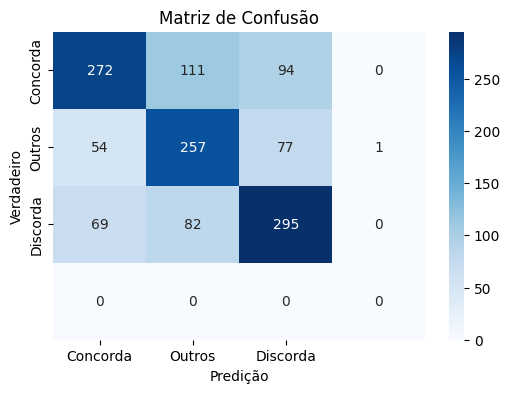

In [128]:
# visualizando a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dados['label_original'].unique(),
            yticklabels=dados['label_original'].unique())
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# quero fazer um estudo sobre em qual tipo de dicussão o modelo acertou mais